# Revenue by Genre

### Import relevant packages and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import clean_data as imd
%matplotlib inline
sns.set()

In [2]:
combined = imd.movies_combined()

## Analysis

### Various profitability metrics by Genre

In [3]:
# add global profit
combined['profit'] = combined.worldwide_gross - combined.production_budget
# add the genre_count variable to combined
combined['genre_count'] = combined.genres.map(lambda x: int(len(x)))
# create list of genres
genre_list = list(combined.loc[:, 'action':'musical'].keys())
# create dict of genres with value = 0
genre_dict = {}

# aggregate various revenue and profitability metrics by genre
for genre in genre_list:
    genre_dict[genre] = []
    # Total number of movies by genre
    genre_dict[genre].append(int(combined[genre].sum()))
    # Total domestic gross of movies by genre
    genre_dict[genre].append(combined[combined[genre] == 1]
                             ['domestic_gross'].sum())
    # Total weighted domestic gross in cases of multi-genre movies by genre
    genre_dict[genre].append((combined[combined[genre] == 1]
                              ['domestic_gross']
                              / combined[combined[genre] == 1]
                              ['genre_count']).sum())
    genre_dict[genre].append(combined[combined[genre] == 1]
                             ['worldwide_gross'].sum())
    genre_dict[genre].append(combined[combined[genre] == 1]
                             ['production_budget'].sum())
    genre_dict[genre].append(combined[combined[genre] == 1]
                             ['profit'].sum())
    genre_dict[genre].append(combined[combined[genre] == 1]
                             ['profit'].median())


# convert to df
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index',
                                  columns=['count_movies',
                                           'domestic_gross',
                                           'domestic_gross_dltd',
                                           'worldwide_gross',
                                           'production_budget',
                                           'profit',
                                           'median_profit_per_movie'])
genre_df.reset_index(inplace=True)
genre_df.rename(columns={'index': 'genre'}, inplace=True)

# calculate various other metrics
genre_df['ROI'] = genre_df.profit / genre_df.production_budget
genre_df['mean_profit_per_movie'] = genre_df.profit / genre_df.count_movies

# capitalize genre for charting
genre_df['genre_capitalized'] = genre_df.genre.map(lambda x: str(x).title())
# genre_df

### Revenue over time (Not used in visualizations)

In [4]:
# create list of relevant years
year_list = list(range(2010, 2020))
# create dict of genres with value = 0
year_dict = {}

for year in year_list:
    year_dict[year] = []
    year_dict[year].append((combined[combined['start_year'] == year]
                            ['domestic_gross']).sum())
    year_dict[year].append((combined[combined['start_year'] == year]
                            ['worldwide_gross']).sum())
# convert to df
year_df = pd.DataFrame.from_dict(year_dict, orient='index',
                                 columns=['domestic_gross', 'worldwide_gross'])
year_df.reset_index(inplace=True)
year_df.rename(columns={'index': 'year'}, inplace=True)
year_df['foreign_gross'] = (year_df['worldwide_gross'] -
                            year_df['domestic_gross'])

# year_df

## Visualizations

### US Revenue by Genre

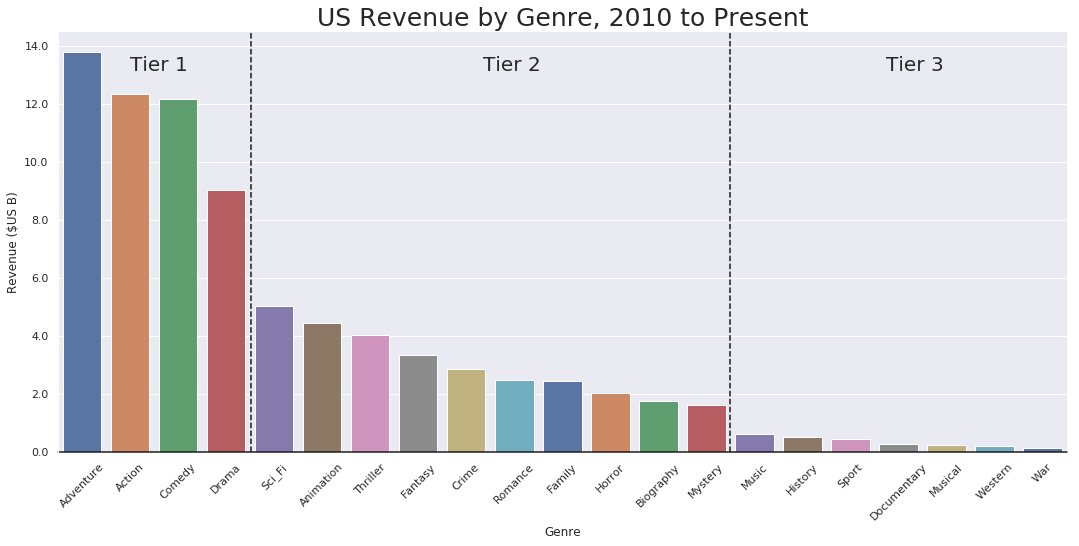

In [5]:
# Set up the matplotlib figure
HEIGHT = 7
LENGTH = 15
text_height = 0.92
f, ax1 = plt.subplots(1, 1, figsize=(LENGTH, HEIGHT), sharex=True)
# plot = sns.barplot(x = 'genre', y = 'domestic_gross_dltd',
# data = genre_df.sort_values(by='domestic_gross_dltd', ascending=False))

# Add Data
sns.barplot(x='genre_capitalized', y='domestic_gross_dltd',
            data=genre_df[genre_df.domestic_gross_dltd > 0]
            .sort_values(by='domestic_gross_dltd', ascending=False),
            ax=ax1, palette="deep")

# Add Attributues
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Revenue ($US B)")
ax1.set_xlabel("Genre")
ax1.set_title("US Revenue by Genre, 2010 to Present", fontsize=25)


# Add vertical lines and text
ax1.axvline(x=(LENGTH/3-LENGTH*0.1+0.02), color='k', linestyle='--')
ax1.axvline(x=(LENGTH/3*3-LENGTH*0.1), color='k', linestyle='--')
ax1.text(0.1, text_height, 'Tier 1',
         fontsize=20,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax1.transAxes)
ax1.text(0.45, text_height, 'Tier 2',
         fontsize=20,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax1.transAxes)
ax1.text(0.85, text_height, 'Tier 3',
         fontsize=20,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax1.transAxes)

sns.despine(bottom=True)
# plt.setp(f.axes, yticks=[])  #adds / removes y-axis ticks
plt.tight_layout(h_pad=2)
plt.xticks(rotation=45)

# ylabels = ['{:,.2f}'.format(y) + 'K'
# for y in ax1.get_xticks()/1000000]
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter
                                    (lambda x,
                                            loc: "{:,}".format(int(x)/10**9)))

# make font larger
sns.set(font_scale=1.5)

# show plot
# plt.savefig('charts/revenue_by_genre.png')
# plt.show()

### ROI by genre

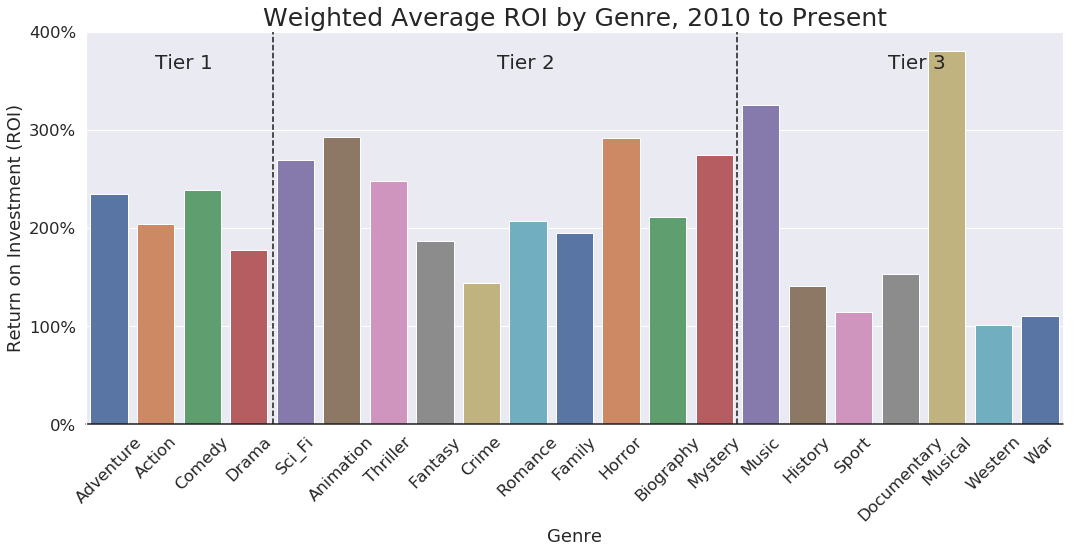

In [16]:
# Set up the matplotlib figure
HEIGHT = 7
LENGTH = 15
text_height = 0.92
f, ax1 = plt.subplots(1, 1, figsize=(LENGTH, HEIGHT), sharex=True)
# plot = sns.barplot(x = 'genre', y = 'domestic_gross_dltd',
# data = genre_df.sort_values(by='domestic_gross_dltd', ascending=False))

# Add Data
sns.barplot(x='genre_capitalized', y='ROI',
            data=genre_df[genre_df.domestic_gross_dltd > 0]
            .sort_values(by='domestic_gross_dltd', ascending=False),
            ax=ax1, palette="deep")

# Add Attributues
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Return on Investment (ROI)")
ax1.set_xlabel("Genre")
ax1.set_title("Weighted Average ROI by Genre, 2010 to Present", fontsize=25)

# Add vertical lines and text
ax1.axvline(x=(LENGTH/3-LENGTH*0.1+0.02), color='k', linestyle='--')
ax1.axvline(x=(LENGTH/3*3-LENGTH*0.1), color='k', linestyle='--')
ax1.text(0.1, text_height, 'Tier 1', fontsize=20,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax1.transAxes)
ax1.text(0.45, text_height, 'Tier 2', fontsize=20,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax1.transAxes)
ax1.text(0.85, text_height, 'Tier 3',
         fontsize=20, horizontalalignment='center',
         verticalalignment='center',
         transform=ax1.transAxes)

sns.despine(bottom=True)
# plt.setp(f.axes, yticks=[])  #adds / removes y-axis ticks
plt.tight_layout(h_pad=2)
plt.yticks(np.arange(5))
plt.xticks(rotation=45)

# ylabels = ['{:,.2f}'.format(y) + 'K' for y in ax1.get_xticks()/1000000]
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{number:.{round}%}"
                                                      .format(number=int(x),round=0)))
# make font larger
sns.set(font_scale=1.5)

# show plot
# plt.savefig('charts/ROI_by_genre.png')
# plt.show()

### Per-movie profit by genre (Mean)

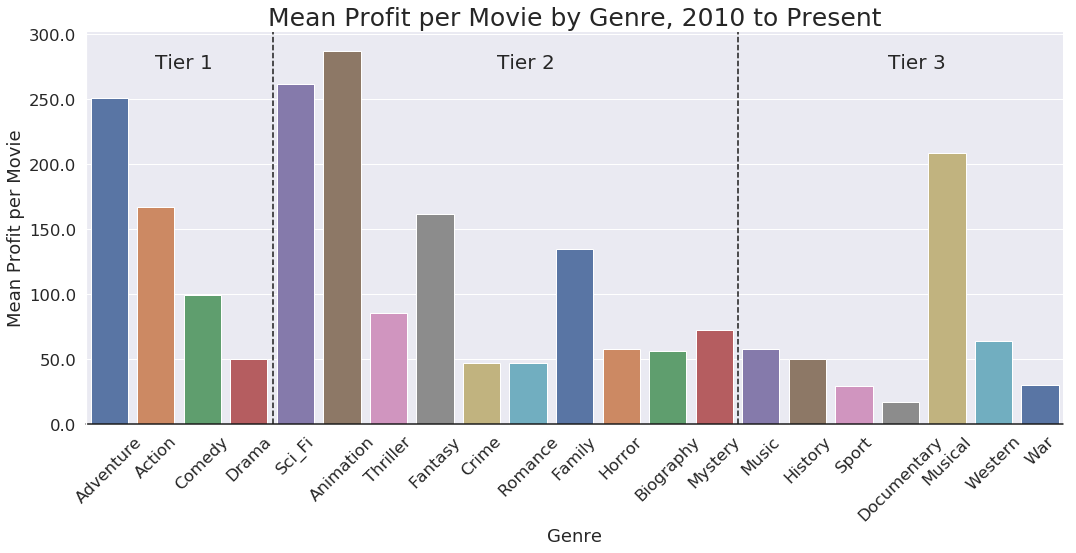

In [7]:
# Set up the matplotlib figure
HEIGHT = 7
LENGTH = 15
text_height = 0.92
f, ax1 = plt.subplots(1, 1, figsize=(LENGTH, HEIGHT), sharex=True)
# plot = sns.barplot(x = 'genre', y = 'domestic_gross_dltd',
# data = genre_df.sort_values(by='domestic_gross_dltd',
# ascending=False))

# Add Data
sns.barplot(x='genre_capitalized', y='mean_profit_per_movie',
            data=genre_df[genre_df.domestic_gross_dltd > 0]
            .sort_values(by='domestic_gross_dltd', ascending=False),
            ax=ax1, palette="deep")

# Add Attributues
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Mean Profit per Movie")
ax1.set_xlabel("Genre")
ax1.set_title("Mean Profit per Movie by Genre, 2010 to Present", fontsize=25)

# Add vertical lines and text
ax1.axvline(x=(LENGTH/3-LENGTH*0.1+0.02), color='k', linestyle='--')
ax1.axvline(x=(LENGTH/3*3-LENGTH*0.1), color='k', linestyle='--')
ax1.text(0.1, text_height, 'Tier 1',
         fontsize=20, horizontalalignment='center',
         verticalalignment='center', transform=ax1.transAxes)
ax1.text(0.45, text_height, 'Tier 2',
         fontsize=20, horizontalalignment='center',
         verticalalignment='center', transform=ax1.transAxes)
ax1.text(0.85, text_height, 'Tier 3',
         fontsize=20, horizontalalignment='center',
         verticalalignment='center', transform=ax1.transAxes)

sns.despine(bottom=True)
# plt.setp(f.axes, yticks=[])  #adds / removes y-axis ticks
plt.tight_layout(h_pad=2)
# plt.yticks(np.arange(5))
plt.xticks(rotation=45)

# ylabels = ['{:,.2f}'.format(y) + 'K' for y in ax1.get_xticks()/1000000]
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter
                                    (lambda x, loc:
                                     "{number:,}".format(number=int(x)/10**6)))

# make font larger
sns.set(font_scale=1.5)

# show plot
# plt.savefig('charts/mean_profit_per_movie_by_genre.png')
# plt.show()


### Per-movie profit by genre (Median)

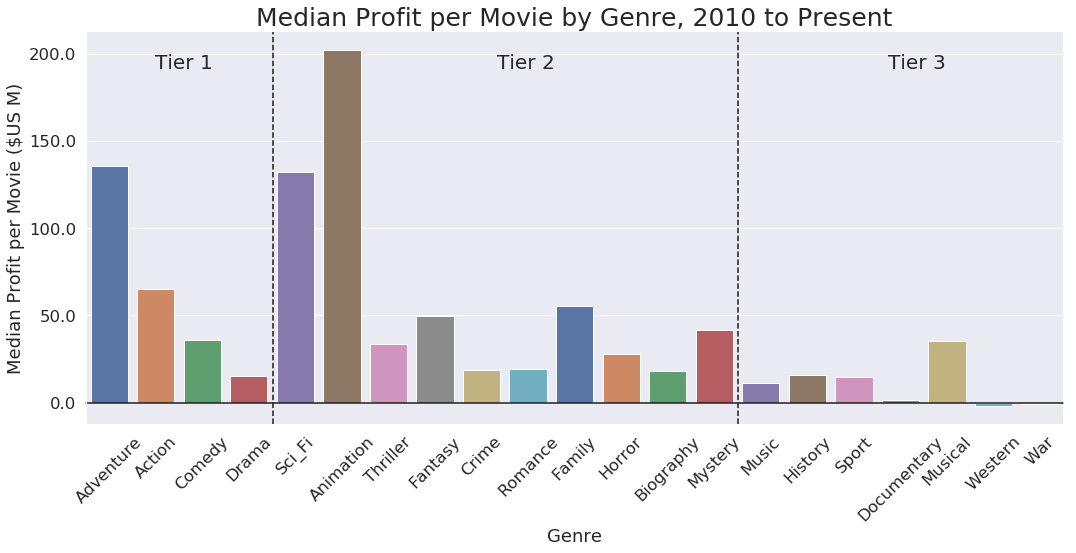

In [8]:
# Set up the matplotlib figure
HEIGHT = 7
LENGTH = 15
text_height = 0.92
f, ax1 = plt.subplots(1, 1, figsize=(LENGTH, HEIGHT), sharex=True)
# plot = sns.barplot(x = 'genre', y = 'domestic_gross_dltd',
# data = genre_df.sort_values(by='domestic_gross_dltd',
# ascending=False))

# Add Data
sns.barplot(x='genre_capitalized', y='median_profit_per_movie',
            data=genre_df[genre_df.domestic_gross_dltd > 0]
            .sort_values(by='domestic_gross_dltd', ascending=False),
            ax=ax1, palette="deep")

# Add Attributues
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Median Profit per Movie ($US M)")
ax1.set_xlabel("Genre")
ax1.set_title("Median Profit per Movie by Genre, 2010 to Present", fontsize=25)

# Add vertical lines and text
ax1.axvline(x=(LENGTH/3-LENGTH*0.1+0.02), color='k', linestyle='--')
ax1.axvline(x=(LENGTH/3*3-LENGTH*0.1), color='k', linestyle='--')
ax1.text(0.1, text_height, 'Tier 1', fontsize=20,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax1.transAxes)
ax1.text(0.45, text_height, 'Tier 2', fontsize=20,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax1.transAxes)
ax1.text(0.85, text_height, 'Tier 3', fontsize=20,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax1.transAxes)

sns.despine(bottom=True)
# plt.setp(f.axes, yticks=[])  #adds / removes y-axis ticks
plt.tight_layout(h_pad=2)
# plt.yticks(np.arange(5))
plt.xticks(rotation=45)

# ylabels = ['{:,.2f}'.format(y) + 'K' for y in ax1.get_xticks()/1000000]
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter
                                    (lambda x, loc:
                                     "{number:,}".format(number=int(x)/10**6)))

# make font larger
sns.set(font_scale=1.5)

# show plot
# plt.savefig('charts/median_profit_per_movie_by_genre.png')
# plt.show()

### Visualization revenue over time stacked bar

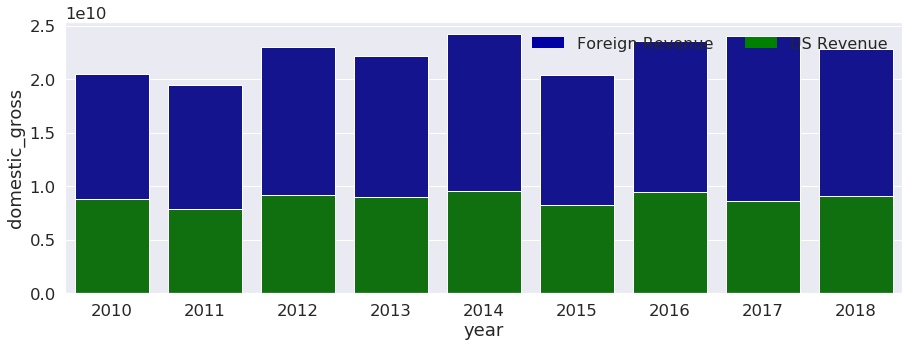

In [9]:
# Set general plot properties
f, ax1 = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

# Plot 1 - background - "total" (top) series
# sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.total,
# color = "red")
sns.barplot(x='year', y='worldwide_gross',
            data=year_df[year_df['year'] < 2019],
            ax=ax1, color='#0000A3')

# Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x='year', y='domestic_gross',
                          data=year_df[year_df['year'] < 2019],
                          ax=ax1, color="green")
# bottom_plot = sns.barplot(x = stacked_bar_data.Group,
# y = stacked_bar_data.Series1, color = "#0000A3")

topbar = plt.Rectangle((0, 0), 1, 1, fc="green", edgecolor='none')
bottombar = plt.Rectangle((0, 0), 1, 1, fc='#0000A3', edgecolor='none')
LENGTH = plt.legend([bottombar, topbar], ['Foreign Revenue', 'US Revenue'],
                    loc=1, ncol=2, prop={'size': 16})
LENGTH.draw_frame(False)

# Optional code - Make plot look nicer
# sns.despine(left=True)
# bottom_plot.set_ylabel("Y-axis label")
# bottom_plot.set_xlabel("X-axis label")

# Set fonts to consistent 16pt size
# for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
#              bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
#     item.set_fontsize(16)
# plt.savefig('charts/revenue_over_time.png')
plt.show()
